# Forecasting
It seems like SARIMA model is the best. Let's compare forecasts between these five zipcodes to decide which one to invest in.

In [35]:
%reload_ext autoreload
%autoreload 2
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle

from SCRIPT.eval_tools import *

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
with open('PKL/timeseries_queens_p.pkl', 'rb') as fp:
    df = pickle.load(fp)
df.index = pd.DatetimeIndex(df.index.values, freq='infer')
df.columns = df.columns.astype(str)

In [38]:
select_zipcode = ['11101', '11693', '11692', '11694', '11103']

In [39]:
# dividing up dataframe
zip_1 = select_zipcode[0]
sel_df1 = df[zip_1]
zip_2 = select_zipcode[1]
sel_df2 = df[zip_2]
zip_3 = select_zipcode[2]
sel_df3 = df[zip_3]
zip_4 = select_zipcode[3]
sel_df4 = df[zip_4]
zip_5 = select_zipcode[4]
sel_df5 = df[zip_5]

# Get Forecast
First, I'll take forecast for each zipcode and combine them.

### zipcode 1

In [40]:
pdq = (1, 1, 1)
SPDQ = (0, 0, 1, 12)

In [41]:
sarima = SARIMAX(sel_df1, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model1 = sarima.fit()

In [42]:
pred1 = sarima_model1.forecast(steps = 60)

### zipcode 2

In [43]:
pdq = (1, 1, 1)
SPDQ = (1, 0, 1, 12)

In [44]:
sarima = SARIMAX(sel_df2, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model2 = sarima.fit()

In [45]:
pred2 = sarima_model2.forecast(steps = 60)

### zipcode 3

In [46]:
pdq = (1, 0, 1)
SPDQ = (1, 0, 1, 12)

In [47]:
sarima = SARIMAX(sel_df3, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model3 = sarima.fit()

In [48]:
pred3 = sarima_model3.forecast(steps = 60)

### zipcode 4

In [49]:
pdq = (1, 0, 0)
SPDQ = (1, 0, 1, 12)

In [50]:
sarima = SARIMAX(sel_df4, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model4 = sarima.fit()

In [51]:
pred4 = sarima_model4.forecast(steps = 60)

### zipcode 5

In [52]:
pdq = (0, 1, 1)
SPDQ = (1, 0, 1, 12)

In [53]:
sarima = SARIMAX(sel_df5, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model5 = sarima.fit()

In [54]:
pred5 = sarima_model5.forecast(steps = 60)

# Plot Forecast

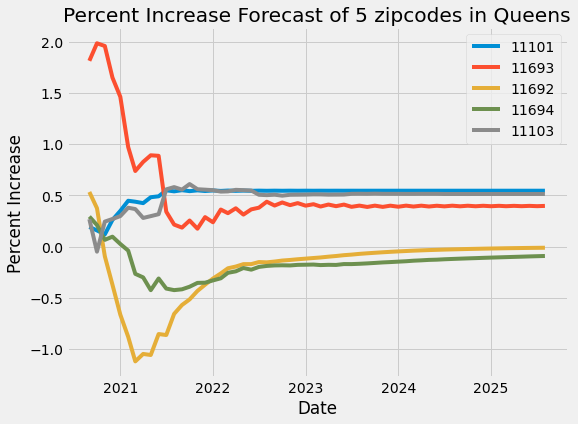

In [57]:
fig = plt.figure(figsize = (8, 6))
plt.plot(pred1, label = select_zipcode[0])
plt.plot(pred2, label = select_zipcode[1])
plt.plot(pred3, label = select_zipcode[2])
plt.plot(pred4, label = select_zipcode[3])
plt.plot(pred5, label = select_zipcode[4])
#plt.xticks(range(0, 12*5, 12), ['2020-09', '2021-09', '2022-09', '2023-09', '2024-09'])
plt.xlabel('Date')
plt.ylabel('Percent Increase')
plt.title('Percent Increase Forecast of 5 zipcodes in Queens')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

It seems like 